<a href="https://colab.research.google.com/github/nwferreri/predictive-analytics-RFR/blob/main/predictive_analytics_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics - Random Forest Regressor

What is the income of the customers?

1. Prepare data set
2. Create Random Forest Regressor model
3. Measure accuracy
4. Tune the model
5. Generate insights

## 0. Directory, Libraries, Data

In [ ]:
# Directory
%cd /content/drive/MyDrive/ZTM/Python for Business/Predictive Analytics/Random Forest

/content/drive/MyDrive/ZTM/Python for Business/Predictive Analytics/Random Forest


In [ ]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Data
df = pd.read_csv('marketing_campaign.csv').dropna()
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

In [ ]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1121.867329,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,643.164161,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,0.000000,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,566.750000,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1120.500000,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1678.250000,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

## 1. Prepare data set

In [ ]:
# Drop ID, Dt_Customer, Recency, and unnamed column
data = df.drop(columns=['ID', 'Dt_Customer', 'Recency'])
data = data.iloc[:, 1:]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [ ]:
# Transform categorical variables
data = pd.get_dummies(data, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2216 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2216 non-null   int64  
 3   Teenhome                 2216 non-null   int64  
 4   MntWines                 2216 non-null   int64  
 5   MntFruits                2216 non-null   int64  
 6   MntMeatProducts          2216 non-null   int64  
 7   MntFishProducts          2216 non-null   int64  
 8   MntSweetProducts         2216 non-null   int64  
 9   MntGoldProds             2216 non-null   int64  
 10  NumDealsPurchases        2216 non-null   int64  
 11  NumWebPurchases          2216 non-null   int64  
 12  NumCatalogPurchases      2216 non-null   int64  
 13  NumStorePurchases        2216 non-null   int64  
 14  NumWebVisitsMonth       

## 2. Create Random Forest Regressor model

In [ ]:
# Isolate X & y
y = data.Income
X = data.drop(columns='Income')

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)

len(X_train), len(y_train), len(X_test), len(y_test)

(1772, 1772, 444, 444)

In [ ]:
# Create Random Forest model
model = RandomForestRegressor(n_estimators=300,
                              random_state=1502)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=1502)

## 3. Measure accuracy

In [ ]:
# Make predictions
y_preds = model.predict(X_test)
y_preds[:5]

array([66801.92333333, 19494.83333333, 64624.01666667, 49716.55666667,
       47914.94666667])

In [ ]:
# Assess predictions with MAE
print(mean_absolute_error(y_test, y_preds))
print(y_test.mean())
print(y_test.std())

6603.190187687688
50734.41891891892
22073.552789063204


## 4. Tune the model

In [ ]:
# Parameter grid
param_grid = {'n_estimators': range(50, 500, 20)}
grid = ParameterGrid(param_grid)

In [ ]:
# Parameter Tuning

# Storing variable
mae = []

# Loop
for params in grid:
  # Build model
  model = RandomForestRegressor(n_estimators=params['n_estimators'],
                                random_state=1502)
  model.fit(X_train, y_train)

  # Make predictions
  y_preds = model.predict(X_test)

  # Assess accuracy
  score = mean_absolute_error(y_test, y_preds)

  # Store results
  mae.append(score)

In [ ]:
# Get best parameters
best_params = grid[np.argmin(mae)]
print(best_params)

{'n_estimators': 50}


Since the best n_estimators is 50, we could try running the grid again with a smaller range.

In [ ]:
# Parameter grid
param_grid = {'n_estimators': range(10, 50, 5)}
grid = ParameterGrid(param_grid)

# Storing variable
mae = []

# Loop
for params in grid:
  # Build model
  model = RandomForestRegressor(n_estimators=params['n_estimators'],
                                random_state=1502)
  model.fit(X_train, y_train)

  # Make predictions
  y_preds = model.predict(X_test)

  # Assess accuracy
  score = mean_absolute_error(y_test, y_preds)

  # Store results
  mae.append(score)

# Get best parameters
best_params = grid[np.argmin(mae)]
print(best_params)

{'n_estimators': 45}


## 5. Generate insights

6422.855955955956
50734.41891891892
22073.552789063204


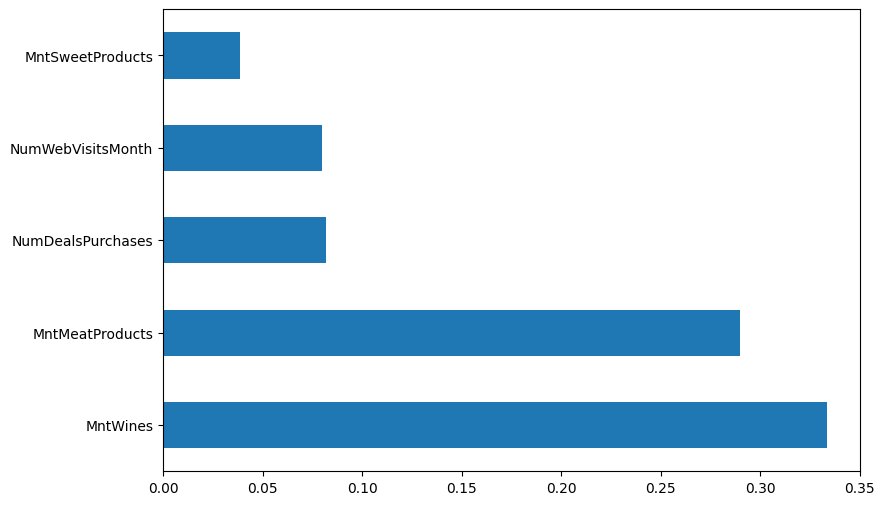

In [ ]:
# Run model with best n_estimators
model = RandomForestRegressor(n_estimators=45,
                              random_state=1502)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)
y_preds[:5]

# Assess predictions with MAE
print(mean_absolute_error(y_test, y_preds))
print(y_test.mean())
print(y_test.std())

# Find feature importances
importance = pd.Series(model.feature_importances_,
                       index=X_train.columns.values)
importance.nlargest(5).plot(kind='barh', figsize=(9, 6));

The standard deviation is much larger than the mean absolute error, so the model is doing well.  From the feature importances, we can conclude the most impactful metrics to predict income are the amount spent on wine in the last 2 years, followed by the amount spent on meat in the last 2 years.